In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **`Introduction`**

In the food service sector, food waste is a serious problem that causes financial losses as well as environmental problems. Designing successful waste reduction strategies requires an understanding of the elements that contribute to waste. In this study, a food service dataset that includes data on meals provided, the number of kitchen employees, weather, staff experience, special events, and waste categories for various food types is subjected to an exploratory data analysis (EDA). This study attempts to provide insights into the causes and timing of food waste by examining categorical patterns, temporal trends, and relationships between operational and environmental factors. The results will offer practical suggestions for enhancing meal service operations, streamlining inventory control, and eventually reducing food waste.

In [96]:
df = pd.read_csv("./data/Food.csv")
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


## **Structure of the Food Waste CSV**  

| **Column Name**   | **Type**        | **Description**                                                                                                                   |
|-------------------|-----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| `date`            | Date/Time       | The service date (e.g., `2023-05-12`). Used to analyze trends over time, and to extract features like month, weekday, and season. |
| `meals_served`    | Integer         | Number of meals served on that day. Helps identify spikes (>3000 meals) and scale waste relative to demand. |
| `kitchen_staff`   | Integer         | Number of staff working in the kitchen. Useful for studying how staffing levels impact waste. |
| `staff_experience`| Categorical     | Experience level of staff (e.g., *beginner*, *intermediate*, *expert*). Important for comparing waste averages across groups. |
| `temperature`     | Numeric         | Daily average temperature (°C/°F). Used to assess how weather (e.g., heat) influences spoilage and food waste. |
| `humidity_percent`| Numeric         | Daily average humidity (%). Another weather factor that affects storage conditions and spoilage. |
| `special_event`   | Boolean / Text  | Indicates if a special event occurred (e.g., *holiday*, *wedding*, *conference*). Events often increase meal volumes and can impact waste. |
| `waste_category`  | Categorical     | Type of food wasted (e.g., *dairy*, *meat*, *vegetables*, *grains*, *wheat*, *barley*). Essential for distribution and seasonal analysis. |
| `past_waste_kg`   | Numeric         | Weight of wasted food in kilograms. This is the **main target variable** for the analysis. |


In [98]:
df.describe()

,ID,meals_served,temperature_C,humidity_percent,day_of_week,past_waste_kg
count,1822.000000,1790.000000,1822.000000,1806.000000,1822.00000,1806.000000
mean,910.500000,373.512849,22.189280,60.791257,3.01427,26.997534
std,526.110413,494.791973,8.919939,17.326232,2.00899,12.791891
min,0.000000,100.000000,-10.372207,30.121111,0.00000,5.008394
25%,455.250000,211.250000,15.684259,46.035158,1.00000,15.990760
50%,910.500000,306.000000,22.115040,61.634935,3.00000,26.832569
75%,1365.750000,407.000000,28.807494,75.789317,5.00000,38.116308
max,1821.000000,4730.000000,60.000000,89.982828,6.00000,49.803703


The dataset's distribution and central tendencies are summarized by the descriptive statistics. There are 1,822 records in the dataset, and most numerical fields have a small number of valid entries because of missing values. Although the distribution is very diverse (standard deviation = 495), the average number of meals served each day was approximately 374; the largest number of meals served in a single day was over 4,700. Extremely cold and hot days may be included in the recorded temperatures, which range from –10.3 °C to 60 °C with an average of 22.2 °C. The average humidity ranges from 30% to 90%, or roughly 61%, which corresponds to actual weather fluctuations. The average amount of waste generated each day is 27 kg, with most days ranging between 16 and 38 kg. The lowest and largest amounts are between 5 and 50 kg, respectively. The day_of_week variable has a mean of roughly 3, indicating balanced coverage throughout the week, and ranges from 0 (Monday) to 6 (Sunday). Overall, the summary emphasizes how external factors like weather and operating conditions can affect meal numbers and waste.

# **`Data Preprocessing`**

To guarantee consistency, precision, and dependability of outcomes, the dataset was meticulously preprocessed before to exploratory analysis.By following the following pretreatment procedures, the dataset was guaranteed to be clear, organized, and prepared for insightful analysis.

### 1. Dropping Duplicates
 The removal of duplicate records prevented skewed analysis due to repeated entries. 

In [99]:
df = df.drop_duplicates()

### 2. Standardising Categorical Columns
Columns such as `kitchen_staff` and  `special_events` should be numeric by nature but are of object data type due to presence of string form of numbers such as "one" etc. They need to be standardised to numeric form        

In [100]:
# Define mapping for text numbers
text_to_num = {
    "one": 1, "two": 2, "three": 3, "four": 4, "five": 5,
    "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10
}

# Clean whitespace, lowercase, and map
df['kitchen_staff'] = df['kitchen_staff'].str.strip().str.lower().replace(text_to_num)

# Convert to float
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce').astype(float)

In [101]:
df['special_event'].unique()


array(['0', '1', 'One '], dtype=object)

In [102]:
df['special_event'] = (
    df['special_event']
    .astype(str).str.strip().str.lower()
    .replace({
        "1": True, "one": True, 
        "0": False,
    })
    .astype(bool)
)


C:\Users\rando\AppData\Local\Temp\ipykernel_14628\2546146955.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [103]:
df['special_event'].unique()


array([False,  True])

### 3. Handle Missing Values
The proper techniques (e.g., median or mode imputation for numerical values, category replacement for categorical fields) were used to handle missing values in important variables like meals_served, kitchen_staff, humidity_percent, past_waste_kg, staff_experience, and waste_category. 

In [104]:
# Handling Missing Values
df['meals_served'] = df['meals_served'].fillna(df['meals_served'].median())
df['kitchen_staff'] = df['kitchen_staff'].fillna(df['kitchen_staff'].mode()[0])
df['humidity_percent'] = df['humidity_percent'].fillna(df['humidity_percent'].mean())
df['past_waste_kg'] = df['past_waste_kg'].fillna(0)
df['staff_experience'] = df['staff_experience'].fillna("Unknown")
df['waste_category'] = df['waste_category'].fillna("Uncategorized")


### 3. Handling Inconsistencies in categorical variables
Inconsistencies like misspellings, extra spaces, and different letter cases were fixed to standardize categorical variables like staff_experience and waste_category. 

In [105]:
df['staff_experience'] = df['staff_experience'].str.lower().str.strip()
df['waste_category'] = df['waste_category'].str.lower().str.strip()

### 4. Removing Outliers
The impact of severe events was lessened by identifying and capping outliers in numerical variables, particularly meals_served and past_waste_kg. 

In [106]:
q_high = df['meals_served'].quantile(0.99)
df['meals_served'] = np.where(df['meals_served'] > q_high, q_high, df['meals_served'])

### 5. Standardising Date Column
In order to facilitate time-series analysis and the identification of seasonal patterns, the date column was also transformed into an appropriate datetime format and the dataset was arranged chronologically. 

In [107]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(by="date")
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['year'] = df['date'].dt.year
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,month,year
341,341,2022-01-01,202.0,9.0,31.976787,66.826645,Saturday,False,45.445455,intermediate,meat,1,2022
364,364,2022-01-01,202.0,9.0,32.318759,66.826645,Saturday,False,45.445455,intermediate,meat,1,2022
1252,1252,2022-01-01,202.0,9.0,31.976787,66.826645,Saturday,False,45.445455,intermediate,meat,1,2022
1275,1275,2022-01-01,202.0,9.0,32.318759,66.826645,Saturday,False,45.445455,intermediate,meat,1,2022
1082,1082,2022-01-02,448.0,16.0,10.092464,56.130327,Sunday,False,29.890039,intermediate,grains,1,2022


## **`Time Series Analysis`**

To find trends in meal services and food waste over time, time series analysis was done. We were able to determine general patterns, variations, and notable peaks by charting the quantity of meals served over time. For example, there were days when the number of meals served above 3,000, which may be attributed to exceptional demand or special occasions. We were able to classify the data into Spring, Summer, Autumn, and Winter by using seasonal decomposition, which showed how the amount of food waste changed over the year. Additional examination by day of the week revealed operational distinctions between weekdays and weekends, and a monthly analysis revealed recurrent seasonal patterns in trash production and meal preparation. This time-based approach offers useful information about the peak times for waste, which helps with staffing, inventory control, and event management planning.

### Creating seasonal categorization (Spring, Summer, Autumn, Winter)

In [108]:
def get_season(month):
    if month in [3,4,5]: 
        return "Spring"
    elif month in [6,7,8]: 
        return "Summer"
    elif month in [9,10,11]: 
        return "Autumn"
    else: 
        return "Winter"

df['season'] = df['month'].apply(get_season)


### Plotting meal service trends over time

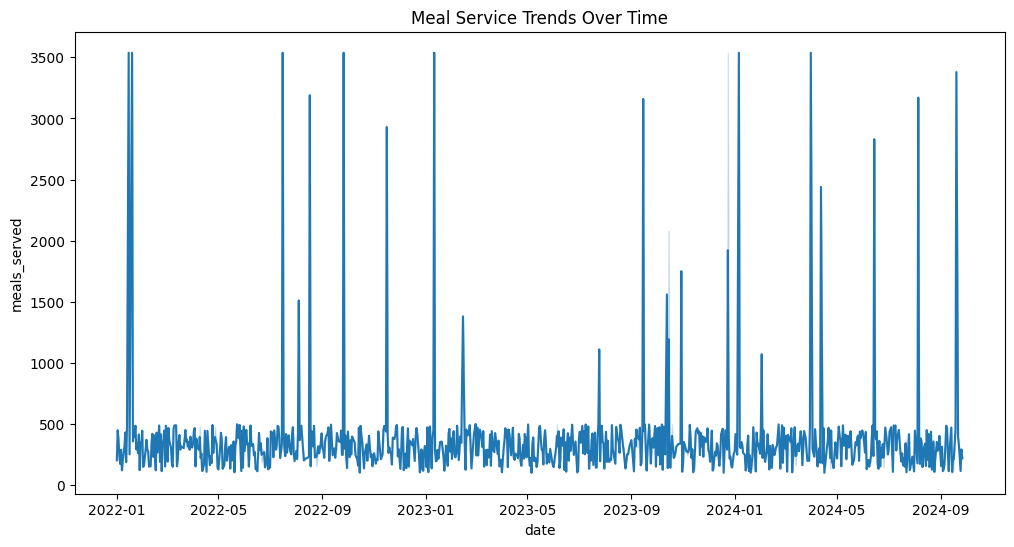

In [109]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='meals_served')
plt.title("Meal Service Trends Over Time")
plt.show()

This graph shows the meal service trends over time from 2022 to 2024.

- For most days, the number of meals served is relatively stable, typically between 200 and 500 meals per day.

- However, there are sharp spikes where the number of meals exceeds 3,000, which stand out as exceptional events compared to the regular pattern. These peaks likely correspond to special events, holidays, or large gatherings where demand for meals dramatically increased.

- The spikes are irregularly spaced but occur throughout the dataset, suggesting that such events happen periodically rather than following a fixed seasonal pattern.

- Apart from these peaks, the base level of meal service remains fairly consistent over the three years, with no clear upward or downward long-term trend.

### Identifying and analyzing spikes in meal service

In [110]:
# Spikes > 3000
spikes = df[df['meals_served'] > 3000]
display(spikes)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,month,year,season
813,813,2022-01-15,3538.0,8.0,19.417384,69.316945,Saturday,False,8.944243,beginner,meat,1,2022,Winter
714,714,2022-01-15,3538.0,8.0,19.261091,69.316945,Saturday,False,8.944243,beginner,meat,1,2022,Winter
1724,1724,2022-01-15,3538.0,8.0,19.417384,69.316945,Saturday,False,8.944243,beginner,meat,1,2022,Winter
1625,1625,2022-01-15,3538.0,8.0,19.261091,69.316945,Saturday,False,8.944243,beginner,meat,1,2022,Winter
443,443,2022-01-19,3538.0,7.0,17.391956,50.422806,Wednesday,False,19.401229,intermediate,vegetables,1,2022,Winter
1336,1336,2022-01-19,3538.0,7.0,17.083574,50.422806,Wednesday,False,19.401229,intermediate,vegetables,1,2022,Winter
1354,1354,2022-01-19,3538.0,7.0,17.391956,50.422806,Wednesday,False,19.401229,intermediate,vegetables,1,2022,Winter
425,425,2022-01-19,3538.0,7.0,17.083574,50.422806,Wednesday,False,19.401229,intermediate,vegetables,1,2022,Winter
284,284,2022-07-16,3538.0,7.0,24.943089,74.458875,Saturday,False,23.680622,beginner,meat,7,2022,Summer
1195,1195,2022-07-16,3538.0,7.0,24.943089,74.458875,Saturday,False,23.680622,beginner,meat,7,2022,Summer


### Analyzing waste patterns by day of the week

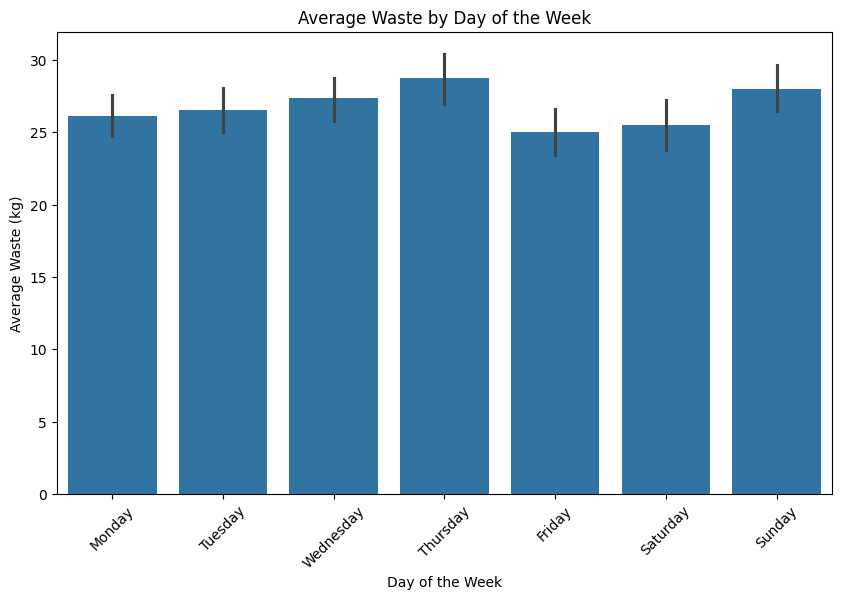

In [111]:
# Average waste by day of the week
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day_of_week', y='past_waste_kg',
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Average Waste by Day of the Week")
plt.ylabel("Average Waste (kg)")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.show()



As seen in this graph:

- Waste production fluctuates slightly throughout the week but stays between 25–29 kg/day on average.

- No extreme highs or lows, suggesting relatively stable waste generation patterns across the week.

- Thursday (~28.5 kg) shows the highest average waste.

- Friday (~25 kg) is the lowest.

Error Bars

- The error bars represent variability (spread of the data).

- All days have overlapping error bars, meaning that the differences between days might not be statistically significant.

- Thursday and Sunday still appear consistently higher even when accounting for variability.

Interpretation

- Waste peaks around Thursday and Sunday, possibly due to mid-week and weekend activities (e.g., restocking, events, or higher household activity).

- Waste dips on Friday and Saturday, which could be due to reduced activity (e.g., preparation for weekend rather than disposal).

### Analyzing waste patterns by months

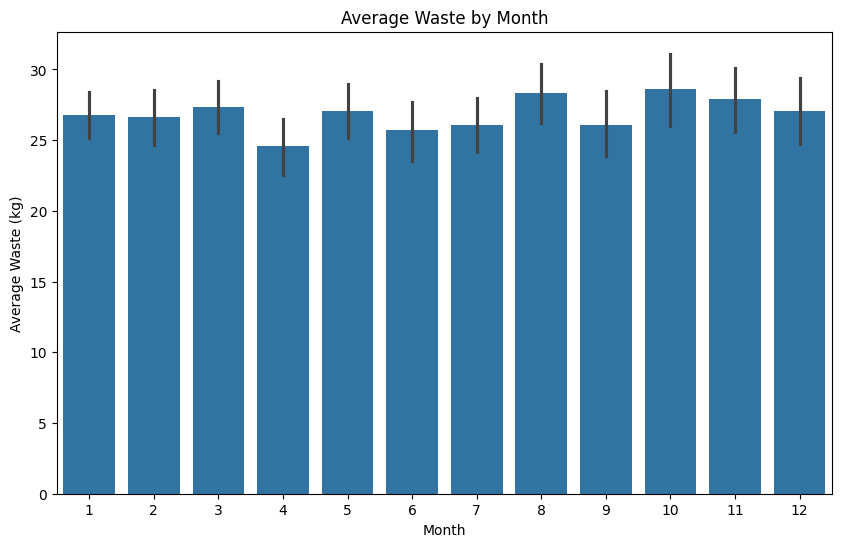

In [112]:
# Average waste by month
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='month', y='past_waste_kg')
plt.title("Average Waste by Month")
plt.ylabel("Average Waste (kg)")
plt.xlabel("Month")
plt.show()


As seen in the graph:

- Waste production is fairly stable across the year, averaging between 25–29 kg/month.

- No extreme spikes or collapses, which suggests consistent patterns in waste generation.

- Highest waste: October (~28.8 kg) and August (~28.5 kg) show the highest average waste levels.

- Lowest waste: April (~24.5 kg) records the lowest monthly average.

- This indicates about a 17% difference between the highest (October) and lowest (April) months.

Error Bars (Variability)

- Error bars overlap across most months, suggesting differences may not be statistically significant.

- Still, August–October consistently trend higher, while April–June trend lower.

Interpretation

- The peak in late summer to autumn (Aug–Oct) could be linked to increased consumption, events, or seasonal activities.

- The dip in spring (Apr–Jun) may indicate lower activity or more efficient waste management during these months.

- Overall, while seasonal variation exists, the general waste pattern is relatively consistent.

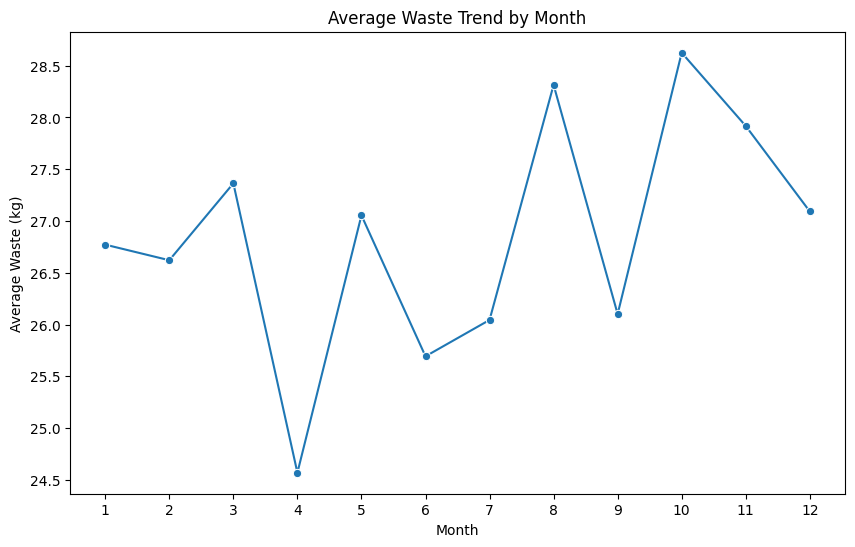

In [113]:
# Alternatively, line plot for trend
monthly_trend = df.groupby("month")['past_waste_kg'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_trend, x='month', y='past_waste_kg', marker="o")
plt.title("Average Waste Trend by Month")
plt.ylabel("Average Waste (kg)")
plt.xlabel("Month")
plt.xticks(range(1,13))
plt.show()

# **`Categorical Analysis`**

### Comparing average food waste by staff experience levels

<Axes: xlabel='staff_experience', ylabel='past_waste_kg'>

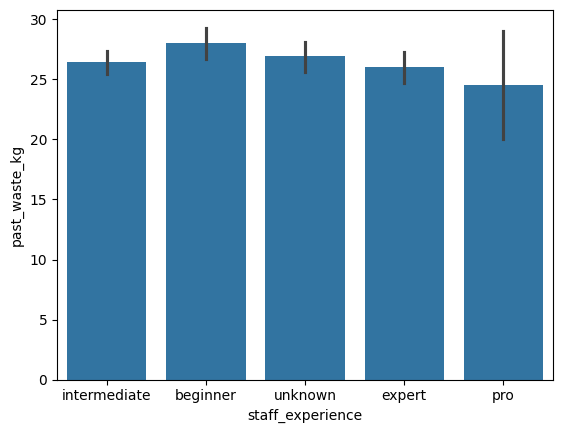

In [114]:
# Waste by staff experience
sns.barplot(data=df, x='staff_experience', y='past_waste_kg')

According this graph:

- Waste levels vary slightly across staff experience categories, staying mostly between 25–28 kg.

- The values are relatively close, but there are some notable differences.

- Highest waste: Beginners (~28 kg) generate the most waste.

- Lowest waste: Pro staff (~24.5 kg) generate the least waste.

- This shows a difference of about 14% between beginners and pros.

Error Bars (Variability)

- Error bars indicate variability in waste for each category.

- Pro staff have the widest variability, meaning their waste performance is less consistent.

- Other groups (intermediate, expert, unknown) show tighter ranges, suggesting more predictable outcomes.

Interpretation

- Less experienced staff (beginners) tend to generate more waste, possibly due to inefficiency, errors, or lack of familiarity with best practices.

- More experienced staff (pro, expert) generally produce less waste, reflecting greater efficiency and skill.

- The “unknown” group falls in the middle, suggesting mixed experience levels.

### Analyzing waste distribution across different food categories

<Axes: ylabel='count'>

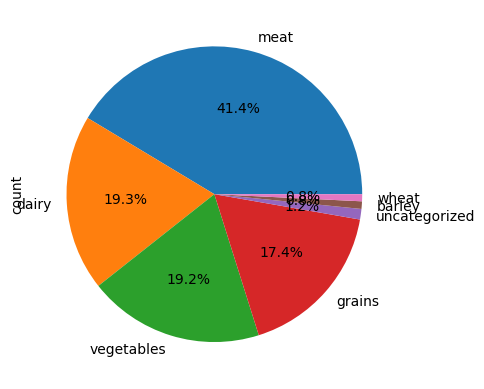

In [115]:
df['waste_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')

As seen in this graph:

Major Contributors

- Meat (41.4%) is the largest contributor, accounting for nearly half of the total waste.

- Dairy (19.3%) and Vegetables (19.2%) follow closely, together making up about 38.5%.

- Grains (17.4%) also contribute significantly.

Minor Contributors

- Barley (1.2%), Uncategorized (0.9%), and Wheat (0.8%) contribute very little in comparison.

Interpretation

- Since meat dominates waste generation, strategies to reduce waste here could have the biggest overall impact.

- Dairy and vegetables are the next critical areas — perhaps perishable items leading to spoilage.

- Grains also matter, but to a lesser extent.

- The tiny contributions from wheat, barley, and uncategorized categories may not warrant as much focus in waste reduction efforts.

### Creating seasonal waste analysis by food category

<Axes: xlabel='waste_category', ylabel='season'>

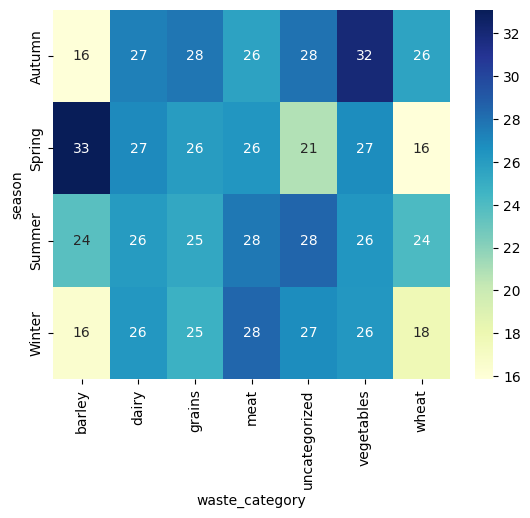

In [116]:
# Seasonal waste heatmap
pivot = df.pivot_table(values='past_waste_kg', 
                       index='season', 
                       columns='waste_category', 
                       aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap="YlGnBu")

Overall Pattern as seen in the graph

- Most categories stay in the 25–28 kg range across seasons, showing relative stability.

- A few exceptions stand out (e.g., barley in spring, vegetables in autumn).

Seasonal Highlights

1. Spring:

- Barley peaks (33 kg) — by far the highest waste level in the heatmap.

- Meat and vegetables are slightly lower (~21–27 kg).

2. Summer:

- Balanced pattern; most categories sit around 24–28 kg.

- No extreme highs or lows.

3. Autumn:

- Vegetables peak at 32 kg — major seasonal contributor.

- Other categories remain moderate (~26–28 kg).

4. Winter:

- Waste levels are generally lower and more stable.

- Wheat (~18 kg) and barley (~16 kg) show the lowest seasonal waste.

Interpretation

- Barley waste is highly seasonal, spiking in spring but minimal in other seasons.

- Vegetable waste peaks strongly in autumn, possibly due to harvest cycles or supply surpluses.

- Meat, dairy, and grains remain relatively stable year-round (~26–28 kg).

- Winter shows the lowest overall waste levels, likely linked to reduced activity or better storage conditions.

### Analyze relationship between weather conditions and food waste

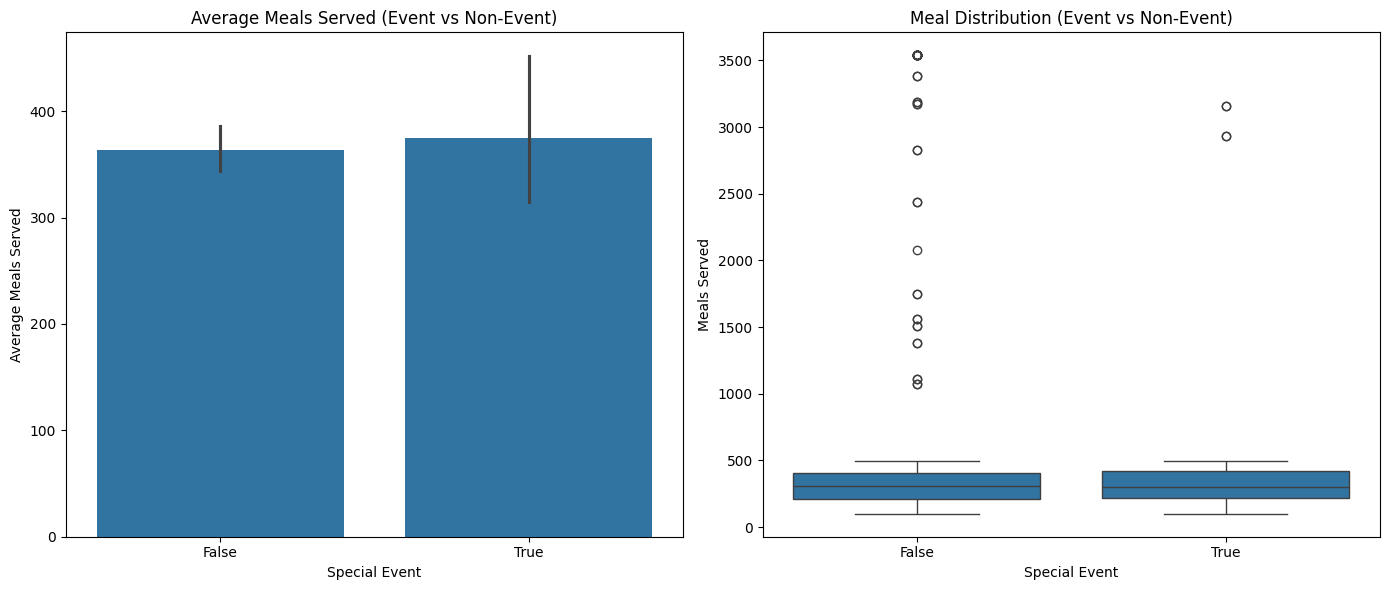

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Bar Plot: Average meals served
sns.barplot(data=df, x='special_event', y='meals_served', estimator=np.mean, ax=axes[0])
axes[0].set_title("Average Meals Served (Event vs Non-Event)")
axes[0].set_xlabel("Special Event")
axes[0].set_ylabel("Average Meals Served")

# Box Plot: Distribution of meals served
sns.boxplot(data=df, x='special_event', y='meals_served', ax=axes[1])
axes[1].set_title("Meal Distribution (Event vs Non-Event)")
axes[1].set_xlabel("Special Event")
axes[1].set_ylabel("Meals Served")

plt.tight_layout()
plt.show()

# **`Correlation Analysis`**

### Plotting correlation heatmap between numerical variables

<Axes: >

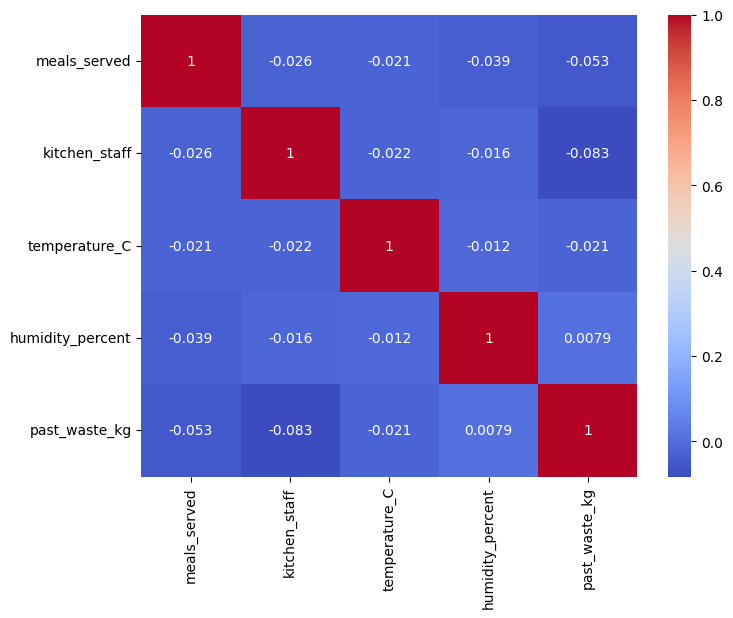

In [118]:
num_cols = ['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 'past_waste_kg']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")

1. General Observations

- All correlations are very weak (close to 0).

- No variable shows a strong positive or negative relationship with waste levels.

2. Key Correlations with past_waste_kg

- Meals served (–0.053) → very slight negative correlation. More meals don’t necessarily increase waste; waste per meal may be managed well.

- Kitchen staff (–0.083) → small negative correlation. A higher number of staff may help reduce waste marginally (better oversight, efficiency).

- Temperature (–0.021) → negligible relationship. Waste isn’t strongly affected by ambient temperature.

- Humidity (+0.008) → essentially no relationship.

3. Other Relationships

- No meaningful correlations exist among meals served, kitchen staff, temperature, and humidity either (all < |0.05|).

- This suggests these operational/environmental variables aren’t major drivers of waste variation.

4. Interpretation

- Waste levels are largely independent of environmental factors (temperature, humidity).

- Operational factors like meals served and staff numbers may have a slight impact but are not strong predictors.

- Waste may instead be influenced by categorical factors (e.g., staff experience, food type, season) rather than continuous environmental metrics.

### Analyze relationship between weather conditions and food waste

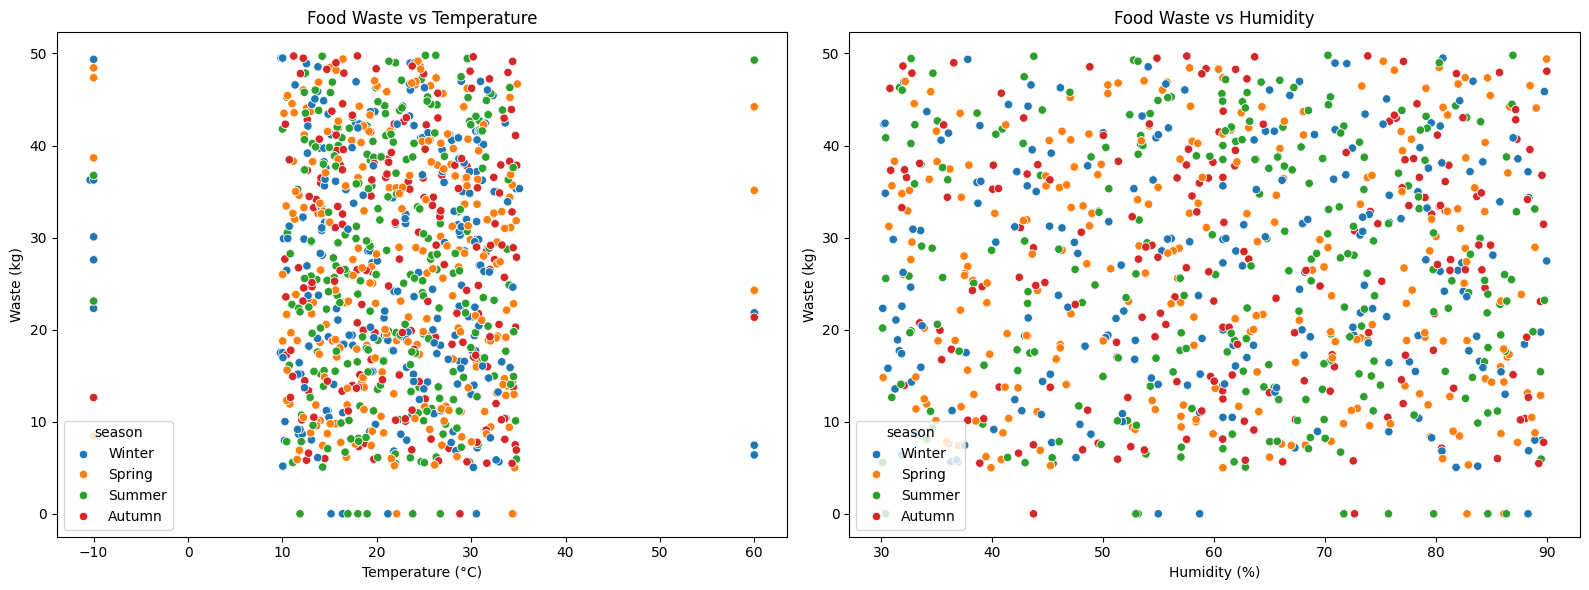

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Temperature vs Waste
sns.scatterplot(data=df, x='temperature_C', y='past_waste_kg', hue='season', ax=axes[0])
axes[0].set_title("Food Waste vs Temperature")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Waste (kg)")

# Humidity vs Waste
sns.scatterplot(data=df, x='humidity_percent', y='past_waste_kg', hue='season', ax=axes[1])
axes[1].set_title("Food Waste vs Humidity")
axes[1].set_xlabel("Humidity (%)")
axes[1].set_ylabel("Waste (kg)")

plt.tight_layout()
plt.show()


### Studying correlation between staff count and waste levels

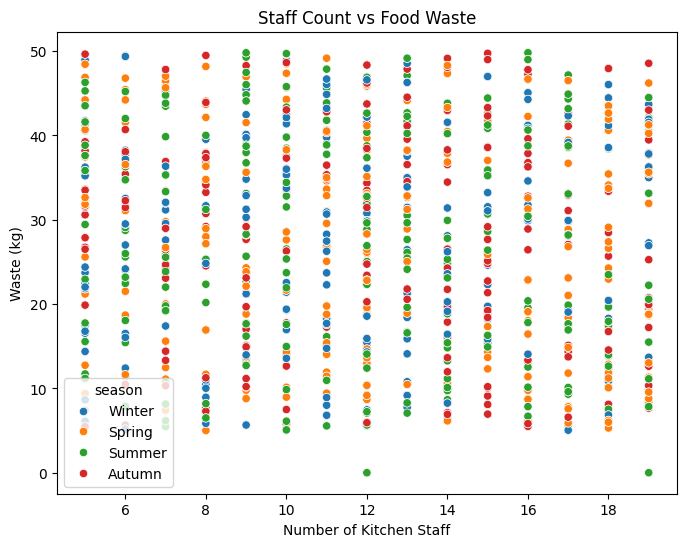

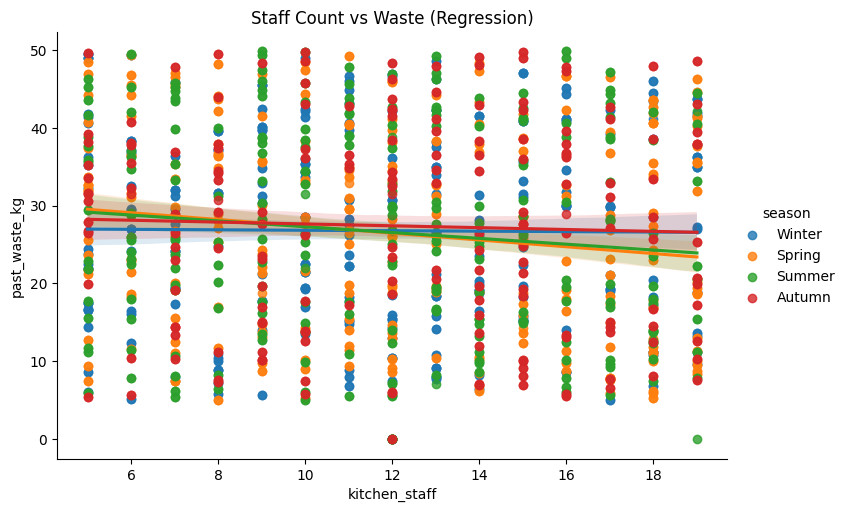

In [120]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='kitchen_staff', y='past_waste_kg', hue='season')
plt.title("Staff Count vs Food Waste")
plt.xlabel("Number of Kitchen Staff")
plt.ylabel("Waste (kg)")
plt.show()

# With regression line
sns.lmplot(data=df, x='kitchen_staff', y='past_waste_kg', hue='season', aspect=1.5)
plt.title("Staff Count vs Waste (Regression)")
plt.show()


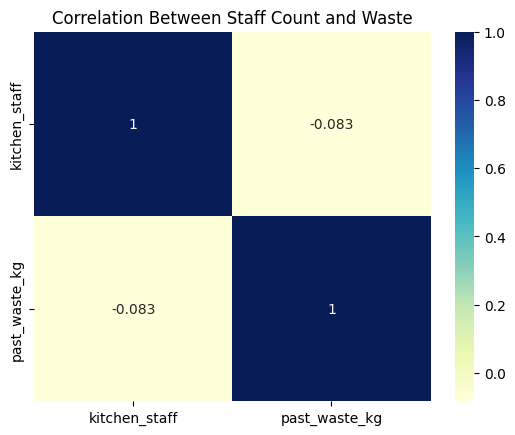

In [121]:
corr_staff = df[['kitchen_staff','past_waste_kg']].corr()
sns.heatmap(corr_staff, annot=True, cmap="YlGnBu")
plt.title("Correlation Between Staff Count and Waste")
plt.show()


### Box plots showing waste distribution by food categories

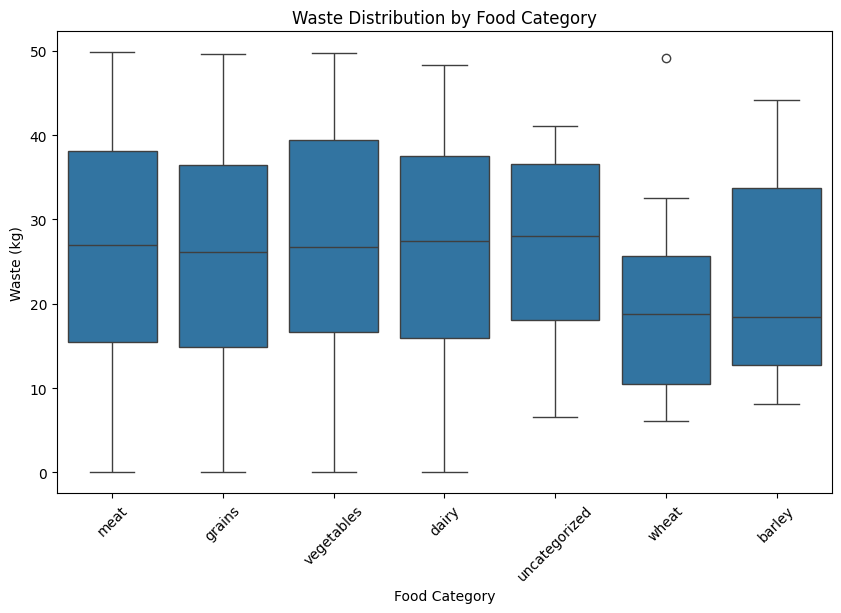

In [122]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='waste_category', y='past_waste_kg')
plt.title("Waste Distribution by Food Category")
plt.xlabel("Food Category")
plt.ylabel("Waste (kg)")
plt.xticks(rotation=45)
plt.show()


1. Central Tendencies (Medians)

- Vegetables, dairy, and uncategorized categories → medians are higher (~27–28 kg).

- Meat and grains → moderate medians (~25–27 kg).

- Wheat and barley → lowest medians (~18–19 kg).

--> This suggests vegetables, dairy, and uncategorized foods contribute more to waste compared to cereals.

2. Spread (IQR – Interquartile Range)

- Vegetables and dairy → widest spread (waste varies a lot depending on circumstances).

- Wheat and barley → narrower spread (waste more consistent, but lower).

- Uncategorized → relatively consistent with fewer extreme values.

3. Extremes & Outliers

- Almost all categories have data points stretching close to the max (50 kg).

- Wheat shows a distinct outlier near 49 kg (rare event where wheat waste was unusually high).

- Other categories show fewer or no extreme outliers.

4. Insights

- High-waste risk foods → Vegetables & dairy (high medians + wide variability). Likely due to spoilage, perishability, and storage issues.

- Moderate-waste foods → Meat & grains (middle range, but not as variable).

- Low-waste foods → Wheat & barley (lower medians, tighter distributions).

### Scatter plots analyzing relationships between meals served and waste generated

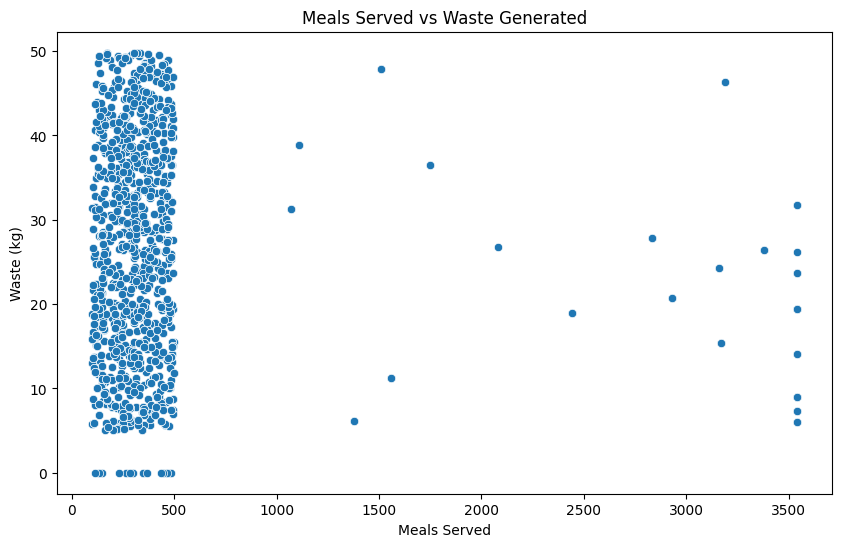

In [123]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='meals_served', y='past_waste_kg')
plt.title("Meals Served vs Waste Generated")
plt.xlabel("Meals Served")
plt.ylabel("Waste (kg)")
plt.show()


This scatterplot shows the relationship between meals served and waste generated (kg). 

1. General Distribution

- Most data points are clustered at the low meals-served range (under 500 meals), with waste varying widely (from 0 up to ~50 kg).

- A few outliers appear at higher meals served (1000–3500 meals), but they are sparse.

2. Trend Observation

- Surprisingly, there is no clear upward trend (more meals served does not directly mean more waste).

- At 3500 meals served, waste levels are actually lower (~5–30 kg) compared to when fewer meals are served.

- This hints that waste management might be more efficient at scale.

3. Possible Explanations

- Operational efficiency: Larger meal services may have stricter controls, reducing waste.

- Small-scale variability: When serving fewer meals, waste fluctuates more (perhaps due to over-preparation or demand uncertainty).

- Data imbalance: Since most observations are clustered under 500 meals, the pattern at higher meal counts may be underrepresented.

 ### Interactive visualizations for exploring waste patterns by multiple dimensions

In [124]:


fig = px.scatter(
    df, 
    x="meals_served", 
    y="past_waste_kg", 
    color="season",          # Dimension 1
    size="kitchen_staff",    # Dimension 2
    hover_data=["date", "waste_category", "staff_experience"] 
)
fig.update_layout(title="Meals vs Waste (Interactive Multi-Dimensional View)")
fig.show()

# **`Key Insights`**

### 1. Seasonal patterns in food waste across different categories

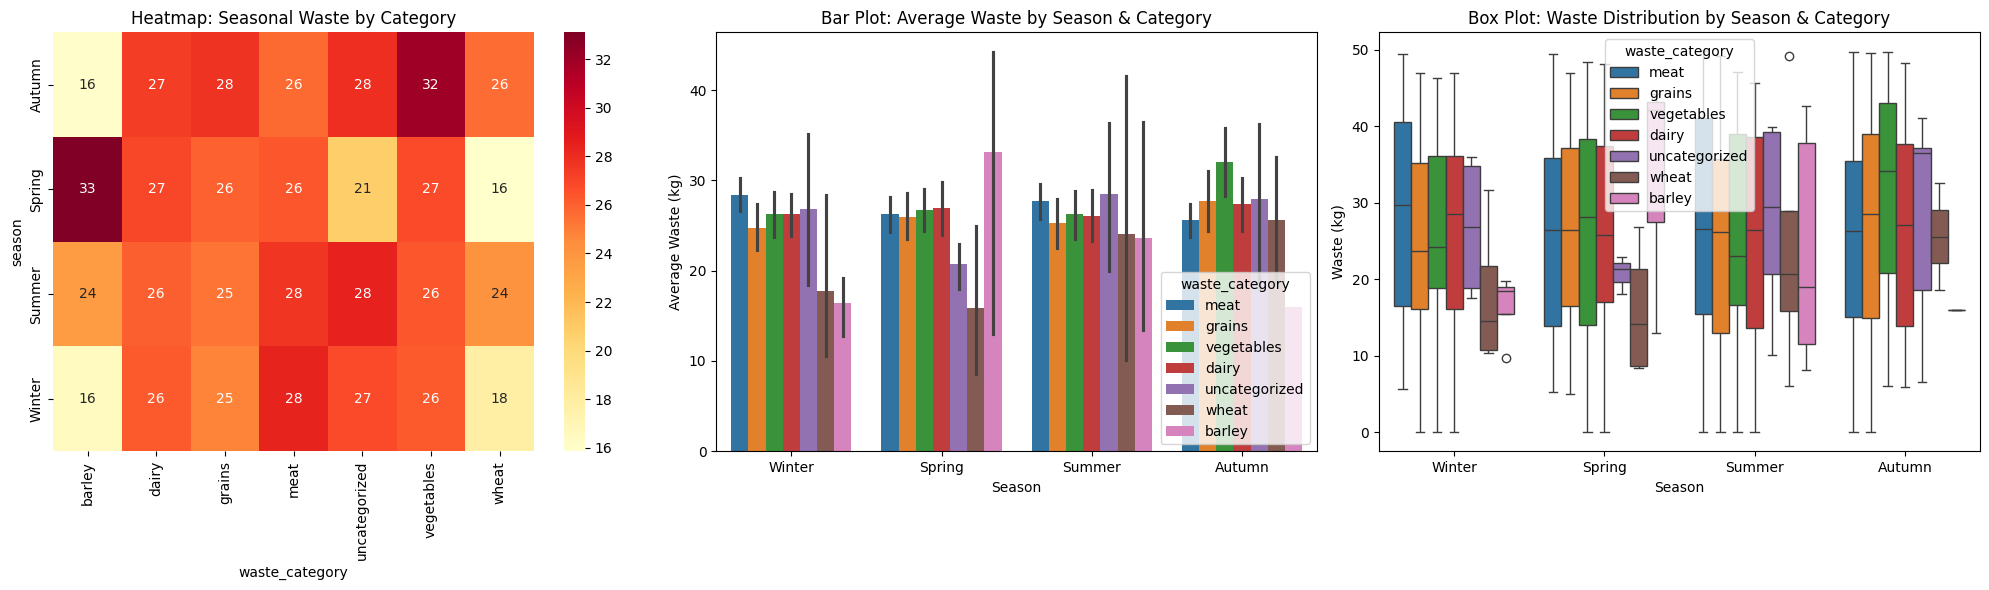

In [125]:
# Pivot table for heatmap
pivot = df.pivot_table(values='past_waste_kg',
                       index='season',
                       columns='waste_category',
                       aggfunc='mean')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# Heatmap
sns.heatmap(pivot, annot=True, cmap="YlOrRd", ax=axes[0])
axes[0].set_title("Heatmap: Seasonal Waste by Category")

# Grouped Bar Chart
sns.barplot(data=df, x='season', y='past_waste_kg', hue='waste_category', 
            estimator=np.mean, ax=axes[1])
axes[1].set_title("Bar Plot: Average Waste by Season & Category")
axes[1].set_ylabel("Average Waste (kg)")
axes[1].set_xlabel("Season")

# Box Plot
sns.boxplot(data=df, x='season', y='past_waste_kg', hue='waste_category', ax=axes[2])
axes[2].set_title("Box Plot: Waste Distribution by Season & Category")
axes[2].set_ylabel("Waste (kg)")
axes[2].set_xlabel("Season")

plt.tight_layout()
plt.show()

 ### 2. Impact of staff experience on waste reduction

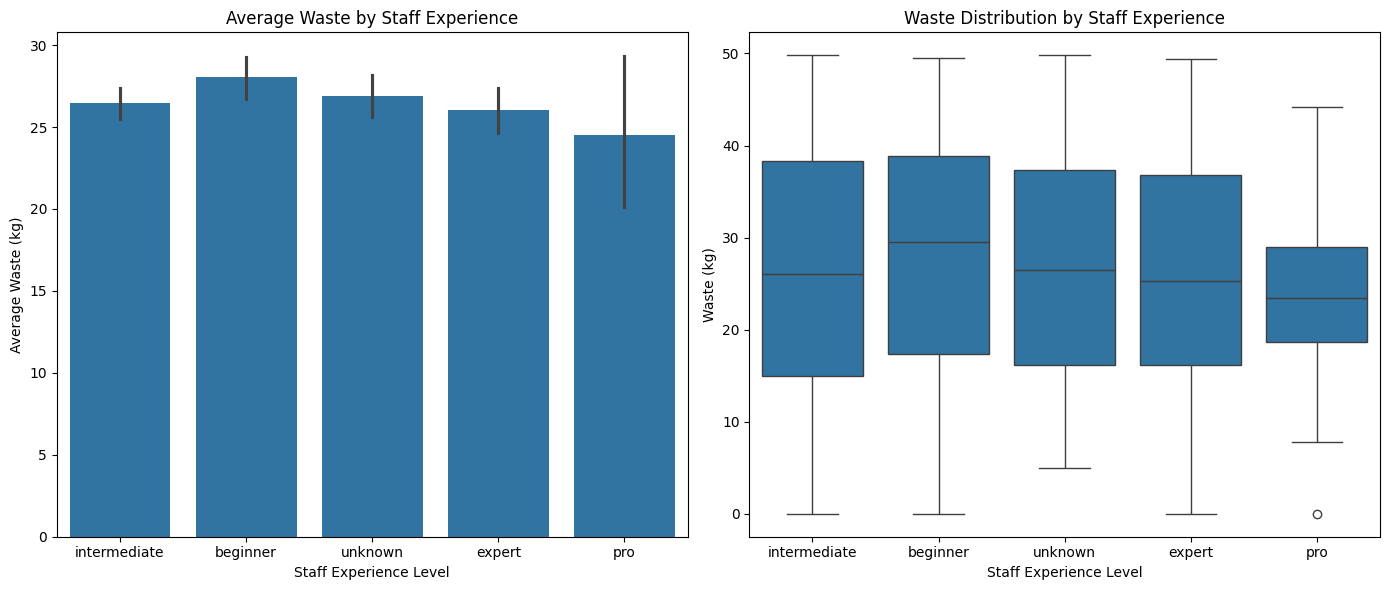

In [126]:
# Create subplot figure
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Bar Plot: Average Waste 
sns.barplot(data=df, x='staff_experience', y='past_waste_kg', estimator=np.mean, ax=axes[0])
axes[0].set_title("Average Waste by Staff Experience")
axes[0].set_xlabel("Staff Experience Level")
axes[0].set_ylabel("Average Waste (kg)")

# Box Plot: Distribution
sns.boxplot(data=df, x='staff_experience', y='past_waste_kg', ax=axes[1])
axes[1].set_title("Waste Distribution by Staff Experience")
axes[1].set_xlabel("Staff Experience Level")
axes[1].set_ylabel("Waste (kg)")

plt.tight_layout()
plt.show()


### 3. Identification of high-waste periods and their causes

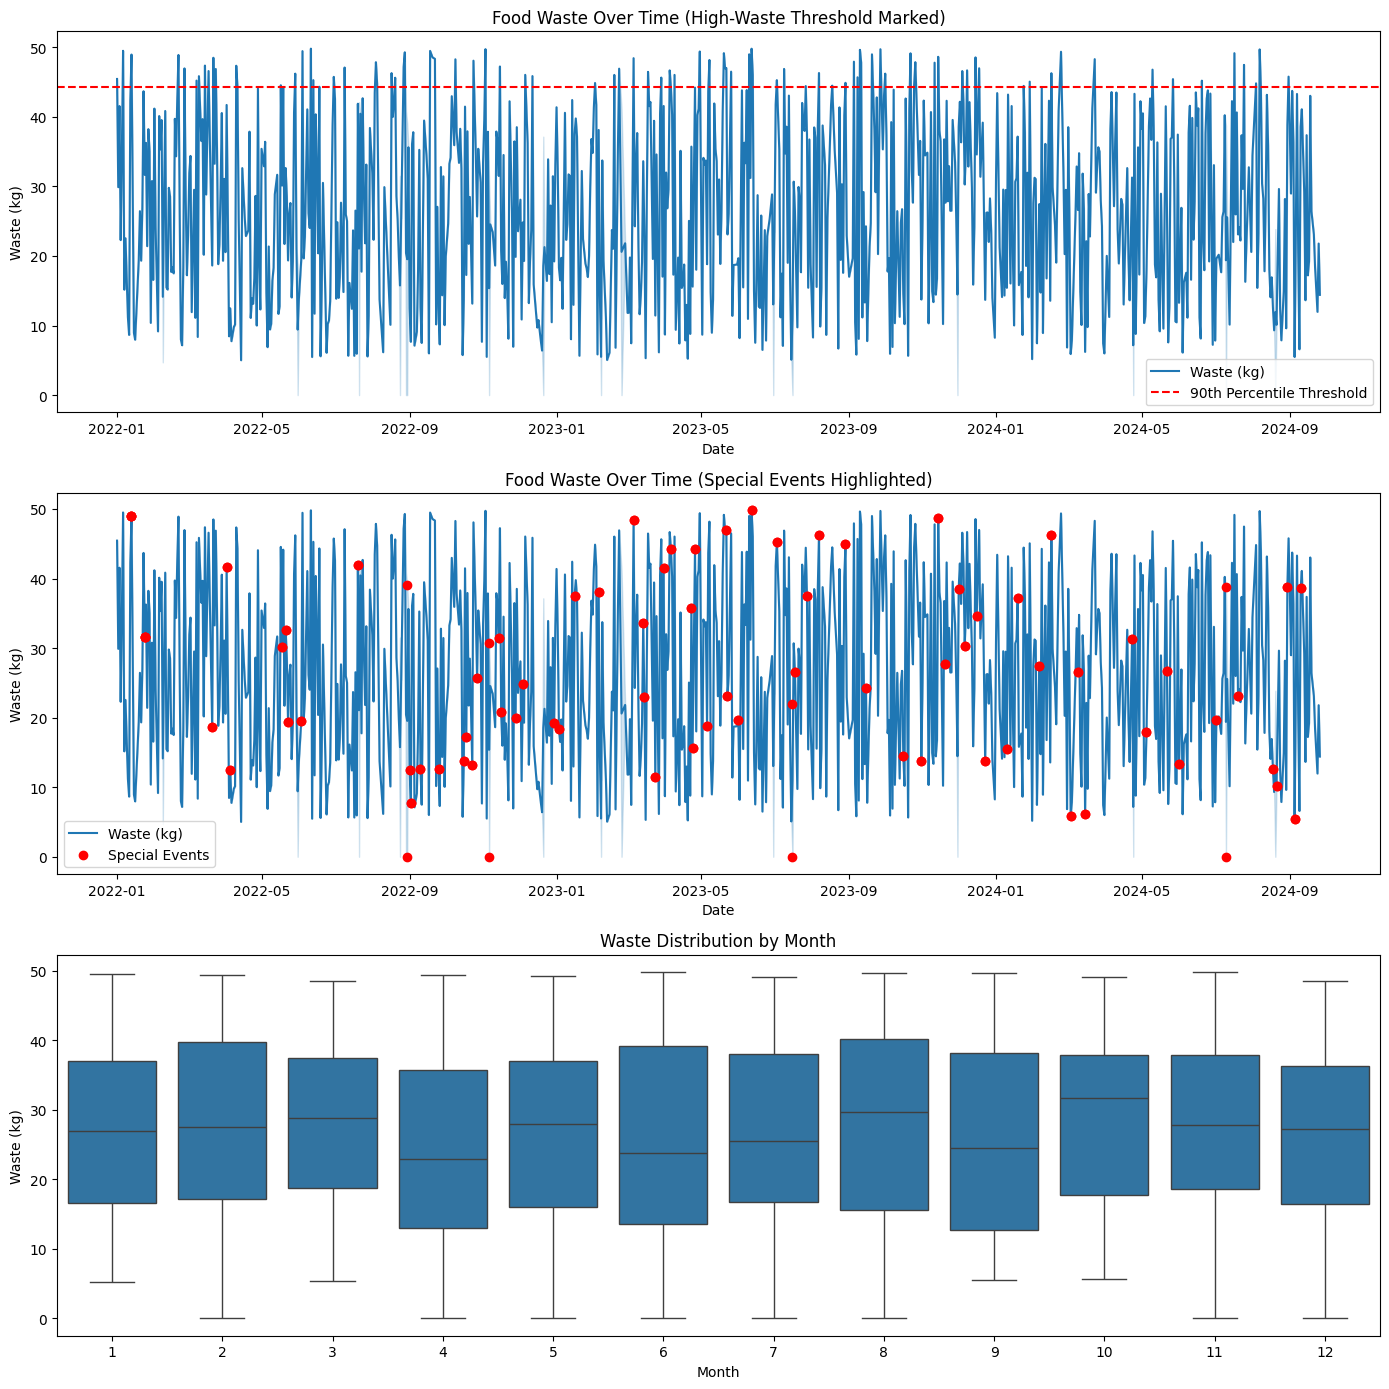

In [127]:
# High waste threshold (e.g., 90th percentile)
high_waste_threshold = df['past_waste_kg'].quantile(0.90)

# Create figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(14,14))

# Waste over time with threshold
sns.lineplot(data=df, x='date', y='past_waste_kg', ax=axes[0], label="Waste (kg)")
axes[0].axhline(high_waste_threshold, color='red', linestyle='--', label="90th Percentile Threshold")
axes[0].set_title("Food Waste Over Time (High-Waste Threshold Marked)")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Waste (kg)")
axes[0].legend()

# Waste over time with special events
sns.lineplot(data=df, x='date', y='past_waste_kg', ax=axes[1], label="Waste (kg)")
event_days = df[df['special_event'] == True]
axes[1].scatter(event_days['date'], event_days['past_waste_kg'], color='red', label="Special Events", zorder=5)
axes[1].set_title("Food Waste Over Time (Special Events Highlighted)")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Waste (kg)")
axes[1].legend()

# Waste distribution by month
sns.boxplot(data=df, x='month', y='past_waste_kg', ax=axes[2])
axes[2].set_title("Waste Distribution by Month")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Waste (kg)")

plt.tight_layout()
plt.show()

### 4. Weather influence on food waste patterns

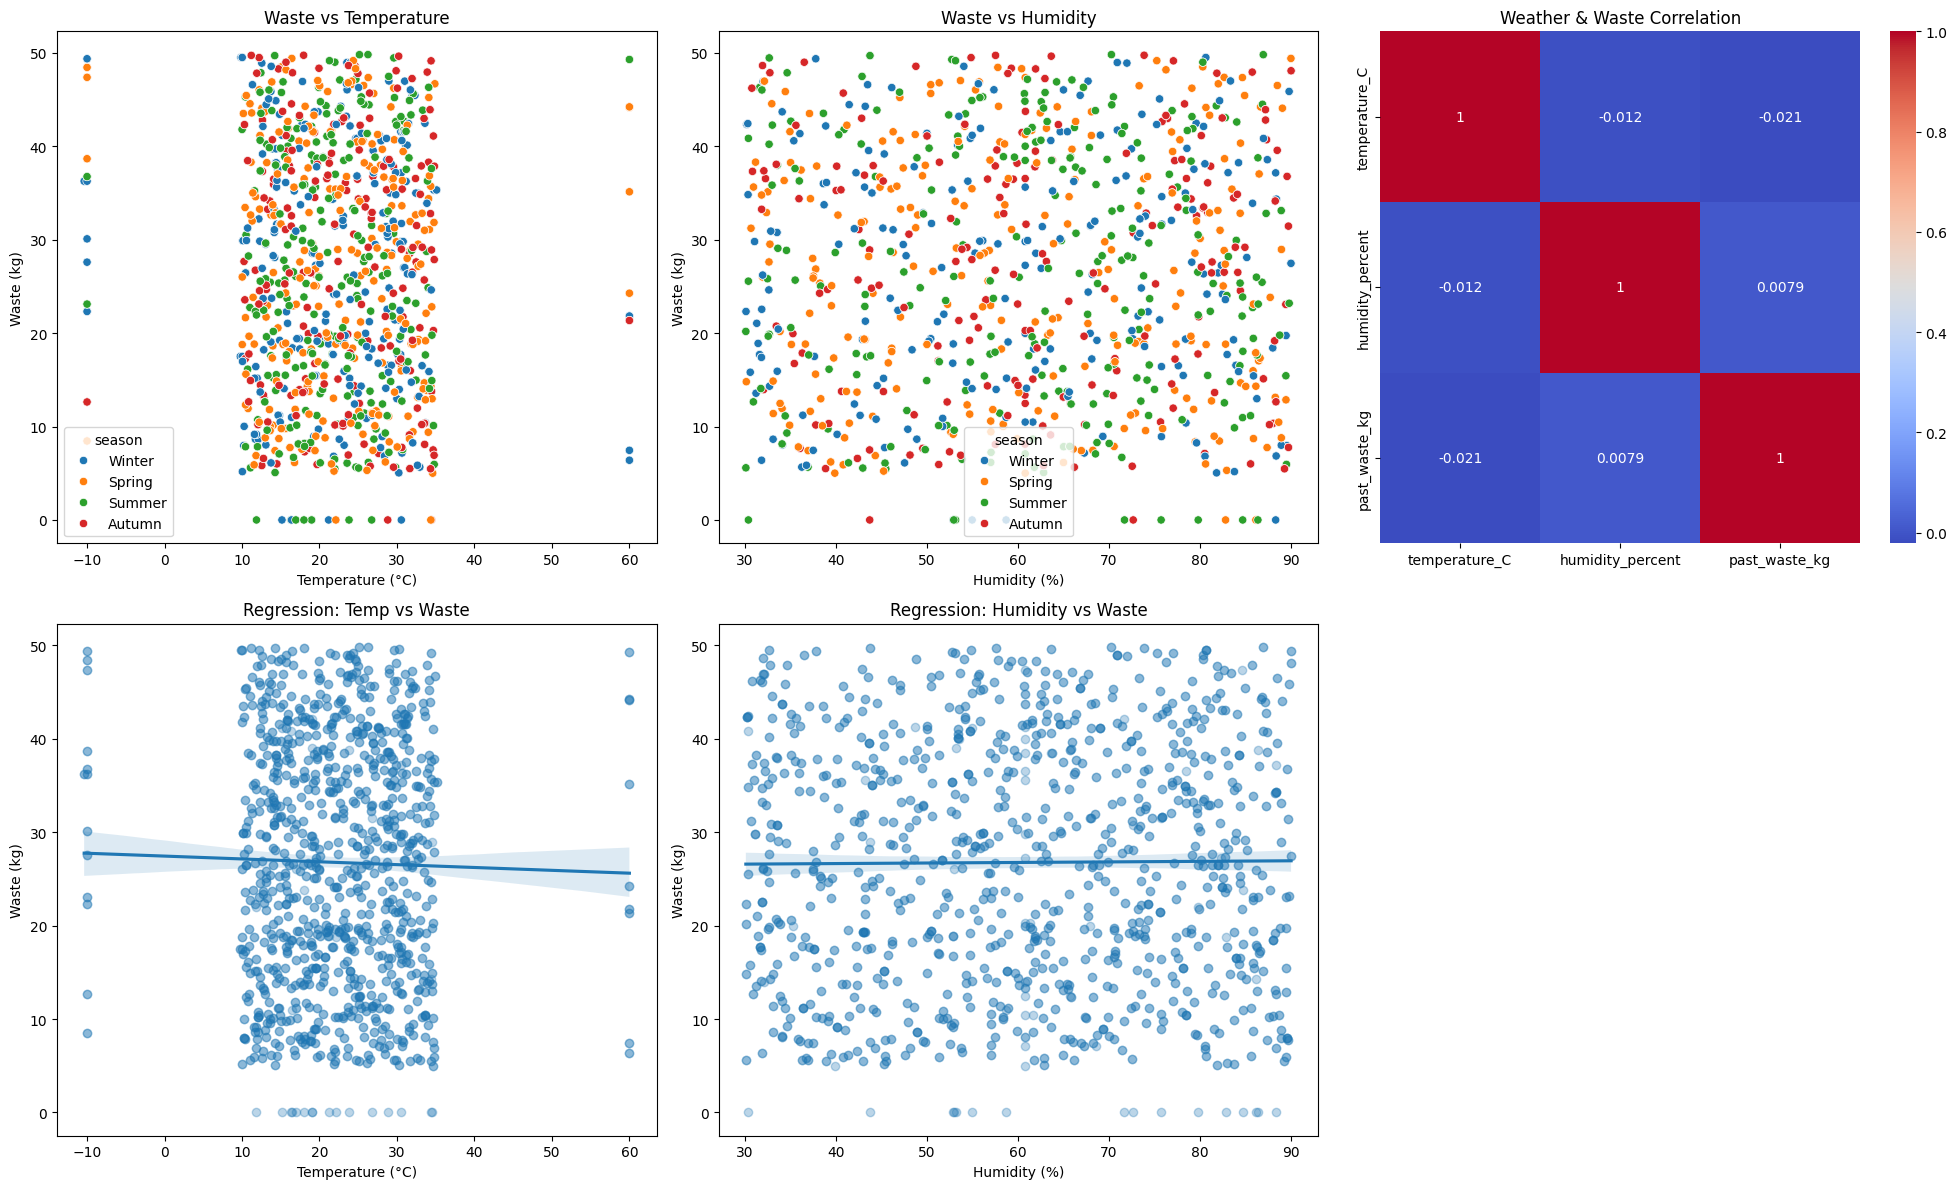

In [128]:
# Correlation matrix
corr_weather = df[['temperature_C','humidity_percent','past_waste_kg']].corr()

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(20,12))

# Scatter: Temp vs Waste
sns.scatterplot(data=df, x='temperature_C', y='past_waste_kg', hue='season', ax=axes[0,0])
axes[0,0].set_title("Waste vs Temperature")
axes[0,0].set_xlabel("Temperature (°C)")
axes[0,0].set_ylabel("Waste (kg)")

# catter: Humidity vs Waste
sns.scatterplot(data=df, x='humidity_percent', y='past_waste_kg', hue='season', ax=axes[0,1])
axes[0,1].set_title("Waste vs Humidity")
axes[0,1].set_xlabel("Humidity (%)")
axes[0,1].set_ylabel("Waste (kg)")

# Correlation Heatmap
sns.heatmap(corr_weather, annot=True, cmap="coolwarm", ax=axes[0,2])
axes[0,2].set_title("Weather & Waste Correlation")

# Regression: Temp vs Waste
sns.regplot(data=df, x='temperature_C', y='past_waste_kg', scatter_kws={'alpha':0.3}, ax=axes[1,0])
axes[1,0].set_title("Regression: Temp vs Waste")
axes[1,0].set_xlabel("Temperature (°C)")
axes[1,0].set_ylabel("Waste (kg)")

# Regression: Humidity vs Waste
sns.regplot(data=df, x='humidity_percent', y='past_waste_kg', scatter_kws={'alpha':0.3}, ax=axes[1,1])
axes[1,1].set_title("Regression: Humidity vs Waste")
axes[1,1].set_xlabel("Humidity (%)")
axes[1,1].set_ylabel("Waste (kg)")

# Remove empty subplot (axes[1,2]) for clean layout
fig.delaxes(axes[1,2])

plt.tight_layout()
plt.show()